In [6]:
import os
import cv2
import json
import random

import numpy as np
import pandas as pd
import seaborn as sns
from glob import glob
from PIL import Image
from numpy.random import seed
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

import tensorflow as tf
from keras.models import Model
from keras import layers,models
from keras.models import Sequential
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from keras.layers import Input, Lambda, Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator

from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing.image import array_to_img, img_to_array, load_img

In [7]:
from keras.initializers import glorot_uniform

#Reading the model from JSON file
with open('model_a.json', 'r') as json_file:
    json_savedModel = json_file.read()
    
#load the model architecture 
ft_model = tf.keras.models.model_from_json(json_savedModel)
ft_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3_input (InputLay [(None, 75, 75, 3)]       0         
_________________________________________________________________
inception_v3 (Model)         (None, 1, 1, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
Total params: 22,851,872
Trainable params: 1,049,088
Non-trainable params: 21,802,784
_________________________________________________________________


In [9]:
ft_model.load_weights('model_a_weights.h5')

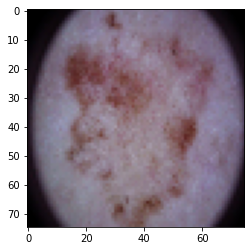

In [10]:
img_path = './input/HAM10000_images_part_1/ISIC_0032870.jpg'

img = image.load_img(img_path, target_size=(75, 75))
imshow(img)

x = image.img_to_array(img)
x = x/255
x = x.reshape(1, 75, 75, 3)

predictions = ft_model.predict(x)

In [172]:
predictions.shape

(1, 512)

In [174]:
type(predictions)

numpy.ndarray

In [189]:
predictions

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        9.7873703e-02, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.6955597e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e

## Text data

In [ ]:
'female',
 'male',
 'abdomen',
 'acral',
 'back',
 'chest',
 'ear',
 'face',
 'foot',
 'genital',
 'hand',
 'lower extremity',
 'neck',
 'scalp',
 'trunk',
 'unknown',
 'upper extremity',
 'confocal',
 'consensus',
 'follow_up',
 'histo',
 'age',

In [240]:
sex_dict = {
    "female" : 0,
    "male" : 1
}
type_dict = {
    "confocal" : 0,
    "consensus" : 1,
    "follow_up" : 2,
    "histo" : 3
}
localization_dict = {
    'abdomen' : 0,
    'acral' : 1,
    'back' : 2,
     'chest' : 3,
     'ear' : 4,
     'face' : 5,
     'foot' : 6,
     'genital' : 7,
     'hand' : 8,
     'lower extremity' : 9,
     'neck' : 10,
     'scalp' : 11,
     'trunk' : 12,
     'unknown': 13,
     'upper extremity' : 14      
}

In [241]:
sex = "female"
dx_type = "follow_up"
localization = "trunk"
age = 50

In [242]:
sex_data = np.zeros(2)
type_data = np.zeros(4)
localization_data = np.zeros(15)

In [243]:
sex_n = sex_dict[sex]
sex_data[sex_n] = 1

In [244]:
type_n = type_dict[dx_type]
type_data[type_n] = 1

In [245]:
localization_n = localization_dict[localization]
localization_data[localization_n] = 1

In [246]:
age_data = [age]

In [247]:
data = []

In [248]:
data = np.concatenate([data, sex_data])

In [249]:
data = np.concatenate([data, type_data])

In [250]:
data = np.concatenate([data, localization_data])

In [251]:
data = np.concatenate([data, age_data])

In [252]:
data = data.flatten()

In [254]:
data = data.reshape(1, 22)

In [255]:
data

array([[ 1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0., 50.]])

In [272]:
df = pd.DataFrame(data, columns = ['female',
                                     'male',
                                     'abdomen',
                                     'acral',
                                     'back',
                                     'chest',
                                     'ear',
                                     'face',
                                     'foot',
                                     'genital',
                                     'hand',
                                     'lower extremity',
                                     'neck',
                                     'scalp',
                                     'trunk',
                                     'unknown',
                                     'upper extremity',
                                     'confocal',
                                     'consensus',
                                     'follow_up',
                                     'histo',
                                     'age',])

In [273]:
df

,female,male,abdomen,acral,back,chest,ear,face,foot,genital,...,neck,scalp,trunk,unknown,upper extremity,confocal,consensus,follow_up,histo,age
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,50.0


## Merging text and image feature arrays

In [274]:
print(data.shape)
print(predictions.shape)

(1, 22)
(1, 512)


In [275]:
test_data = pd.concat([df, pd.DataFrame(predictions)], axis=1)

In [276]:
test_data.shape

(1, 534)

In [277]:
test_data.head()

,female,male,abdomen,acral,back,chest,ear,face,foot,genital,...,502,503,504,505,506,507,508,509,510,511
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [278]:
test_data.loc[:,~test_data.columns.duplicated()]

,female,male,abdomen,acral,back,chest,ear,face,foot,genital,...,502,503,504,505,506,507,508,509,510,511
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Load XGB model

In [279]:
import pickle
file_name = "xgb_classifier.pkl"

# load
xgb_classifier = pickle.load(open(file_name, "rb"))

In [286]:
pred = xgb_classifier.predict(test_data)[0]

In [287]:
output_labels = ["Actinic Keratoses and Intraepithelial Carcinoma / Bowen's Disease (akiec)",
                 "Basal Cell Carcinoma (bcc)",
                 "Benign Keratosis-like Lesions (solar lentigines / seborrheic keratoses and lichen-planus like keratoses, bkl)",
                 "Dermatofibroma (df)",
                 "Melanocytic Nevi (nv)",
                 "Vascular Lesions (angiomas, angiokeratomas, pyogenic granulomas and hemorrhage, vasc)",
                 "Melanoma (mel)"]

output_length = len(output_labels)

In [288]:
print(output_labels[pred])

Benign Keratosis-like Lesions (solar lentigines / seborrheic keratoses and lichen-planus like keratoses, bkl)
